# K-Nearest Neighbours Classifier

<span>KNN is a very simple machine learning algorithim. Given a distance parameter and nearest neighbours parameter. The algorithim use premise that points that are related to one class are closely associated with each other. The algorithim will group each random data points place hyperplane using its K-Nearest Neighbours.</span>

### Import Preliminaries

In [18]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd 
import sklearn
import seaborn as sns
import warnings

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [19]:
# Import data 
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Train-test split the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

# View the training dataframe
pd.DataFrame(train_x, columns=breast_cancer['feature_names']).head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,20.470,20.670,134.700,1299.000,0.092,0.131,0.152,0.102,0.217,0.054,0.834,1.736,5.168,100.400,0.005,0.031,0.041,0.017,0.028,0.003,23.230,27.150,152.000,1645.000,0.110,0.253,0.309,0.161,0.322,0.064
1,10.030,21.280,63.190,307.300,0.081,0.039,0.002,0.005,0.163,0.064,0.185,1.341,1.184,11.600,0.006,0.006,0.002,0.004,0.014,0.002,11.110,28.940,69.920,376.300,0.113,0.071,0.012,0.026,0.235,0.081
2,7.760,24.540,47.920,181.000,0.053,0.044,0.000,0.000,0.159,0.059,0.386,1.428,2.548,19.150,0.007,0.005,0.000,0.000,0.027,0.003,9.456,30.370,59.160,268.600,0.090,0.064,0.000,0.000,0.287,0.070
3,10.910,12.350,69.140,363.700,0.085,0.047,0.012,0.014,0.145,0.060,0.175,1.027,1.267,11.090,0.003,0.012,0.011,0.009,0.029,0.003,11.370,14.820,72.420,392.200,0.093,0.075,0.029,0.032,0.214,0.066
4,11.080,14.710,70.210,372.700,0.101,0.057,0.024,0.026,0.157,0.067,0.207,1.805,1.377,19.080,0.015,0.021,0.015,0.016,0.031,0.005,11.350,16.820,72.010,396.500,0.122,0.082,0.039,0.043,0.190,0.073


### Targets

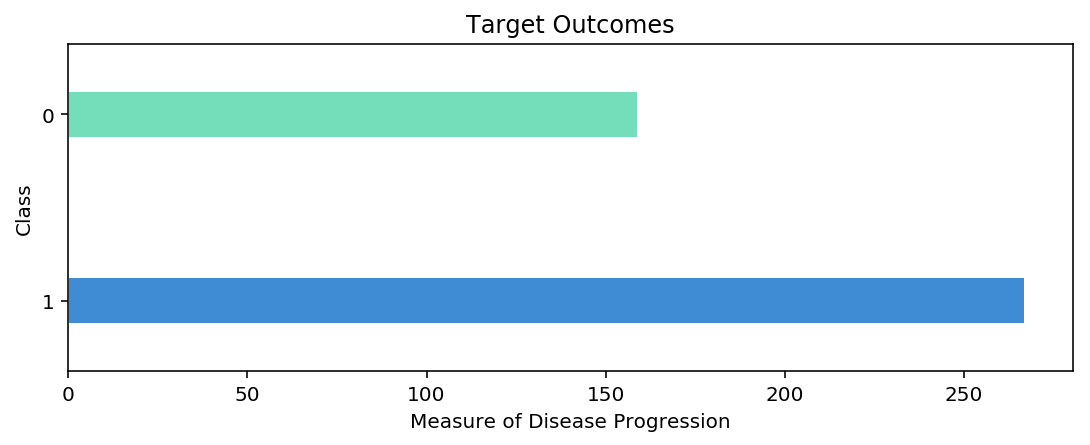

In [21]:
# Plot a barplot of the target clasees
pd.Series(train_y).value_counts().plot.barh(grid=False, color=['#3F8CD5','#73DEB9'], width=0.25,edgecolor='w')
plt.title('Target Outcomes')
plt.ylabel('Class')
plt.xlabel('Measure of Disease Progression');

### Fit the Model

In [12]:
# Fit the intial knn model 
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validation Score

In [13]:
scores = cross_val_score(knn_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.92734


##### Confustion Matrix

In [14]:
# Training Confusion Matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, knn_model.predict(train_x)))
cmatrix.index.name = 'class'
cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction     
                      0    1
result class                
actual 0            142   13
       1              6  265

##### Parameter Tuning

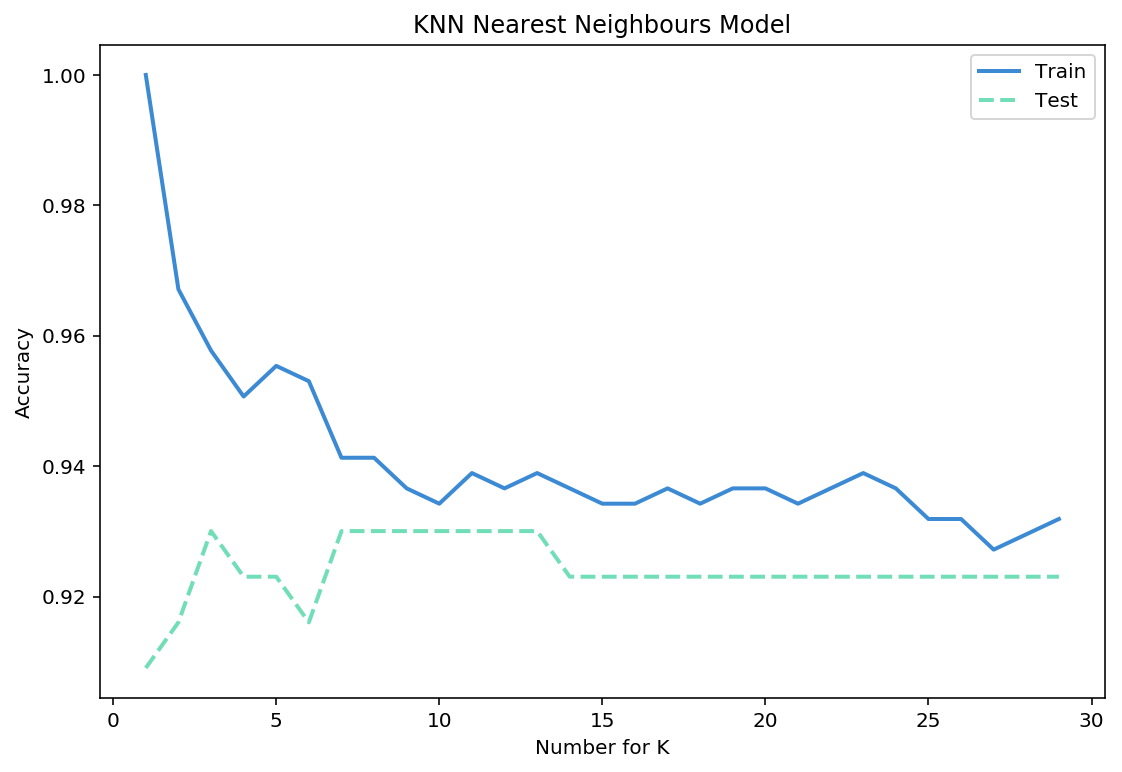

In [15]:
# Define paraameter range and score lists
neighbors_range = np.arange(1,30)
train_score = []
test_score = []

# Train a knn_model for every neighbour value in our list
for k in neighbors_range :
    knn_model=KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)
    train_score.append(knn_model.score(train_x,train_y))
    test_score.append(knn_model.score(test_x,test_y))

# Plot our results
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(neighbors_range,train_score,label="Train",linewidth=2, color='#3C8AD4') 
plt.plot(neighbors_range,test_score,label="Test", linewidth=2,linestyle='--', color='#71DEB8')
plt.legend()
plt.title('KNN Nearest Neighbours Model')
plt.xlabel('Number for K')
plt.ylabel('Accuracy');

### Predict Results

In [16]:
# Viwe some predictions
pd.Series(knn_model.predict(test_x)).head(n=7)

0    1
1    1
2    0
3    1
4    1
5    1
6    0
dtype: int64

###  General Notes

- Good baseline model
- The algorithm finds the closest points in the training dataset (it's neighbors).
- At minimum use 1 + number of your target classes in your dataset for your value of k
- The algorithm uses voting to assign the label, meaning it calculates the distance for itself and all other points. Then calculate its class by comparing its k - nearest data points. It assigns itself the class that is most frequent between its neighbors.
- The algorithm is computation intensive during the prediction portion of the model
- A small number of neighbor often work the best
- The algorithm often does not work well on data with high dimensionality and high sparsity (lots of zero)

Author: Kavi Sekhon